I will try and predict student gender using this dataset. This dataset has various data on students including race, test scores and even wether they have lunch or not.

link: https://www.kaggle.com/spscientist/students-performance-in-exams



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.pandas.set_option('display.max_columns', None)

In [2]:
raw_df = pd.read_csv('StudentsPerformance.csv')
raw_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
raw_df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [4]:
raw_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


judging from the min score, students tend to do worse in math then the other two subjects. That was expected since math is more challenging.

In [5]:
raw_df.lunch.unique()


array(['standard', 'free/reduced'], dtype=object)

In [6]:
raw_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Missing values

In [7]:
#Group all the features with missing values
missing = [feature for feature in raw_df.columns if raw_df[feature].isnull().sum()>1]

#print % of missing values
for feature in missing:
    print('{}: {}% is missing'.format(feature,np.round(raw_df[feature].isnull().mean(),4)))
    
missing

[]

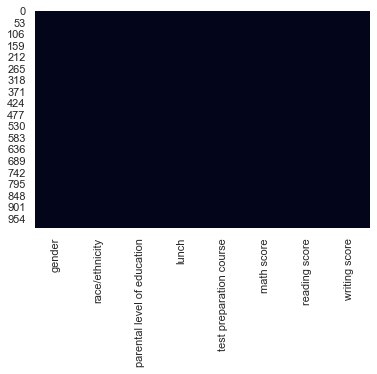

In [8]:
sns.heatmap(raw_df.isnull(),cbar=False)

This dataset doesn't contain any missing values

In [9]:
#numerical variables
raw_df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

The data is balanced.

In [10]:
num_ft = [feature for feature in raw_df.columns if raw_df[feature].dtype!='O']

num_ft

['math score', 'reading score', 'writing score']

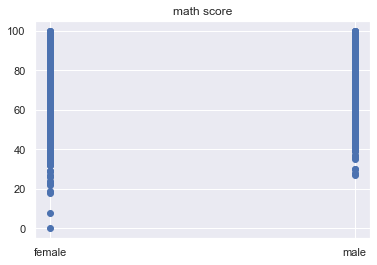

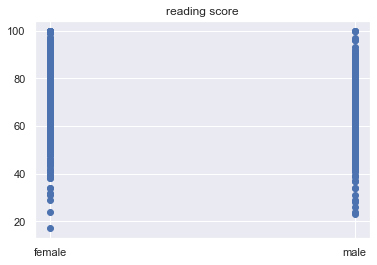

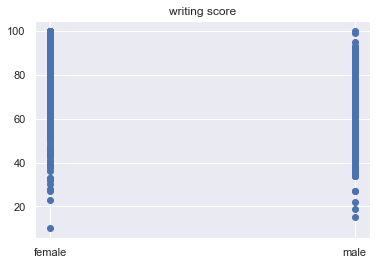

In [11]:
#compare the data to gender
for feature in num_ft:
    plt.scatter(raw_df['gender'],raw_df[feature])
    plt.title(feature)
    plt.show()

The scores of males and females are similar. also there aren't alot of outliers

# Categorical Data


In [12]:

categ_ft = [feature for feature in raw_df.columns if raw_df[feature].dtype=='O' and feature!='gender']

categ_ft

['race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

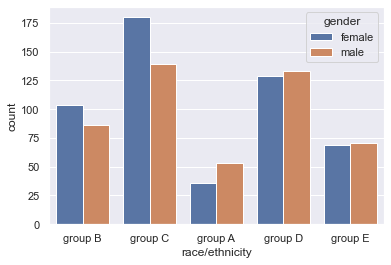

In [13]:
sns.countplot(raw_df['race/ethnicity'], hue = raw_df['gender'])

Overall there is more females than males but in terms of groups males are more than females in 3 groups. I will drop this feature because it may lead the model to be biased

In [14]:
df = raw_df.copy()
df = df.drop('race/ethnicity', axis = 1)
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,99,95
996,male,high school,free/reduced,none,62,55,55
997,female,high school,free/reduced,completed,59,71,65
998,female,some college,standard,completed,68,78,77


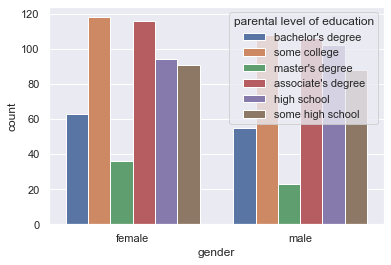

In [15]:
sns.countplot(raw_df['gender'], hue=raw_df['parental level of education'])

the numbers seems higher for females students this might be due to the higher number of females 

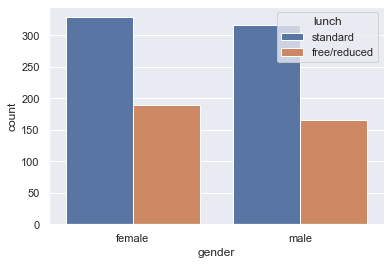

In [16]:
sns.countplot(raw_df['gender'], hue=raw_df['lunch'])

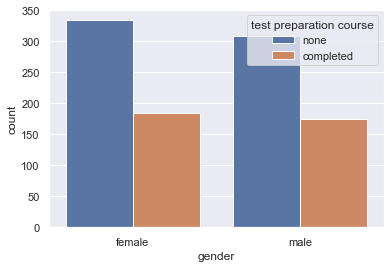

In [17]:
sns.countplot(raw_df['gender'], hue=raw_df['test preparation course'])

The majority of student didn't complete a test preparation course. This could impact the students test courses negetively

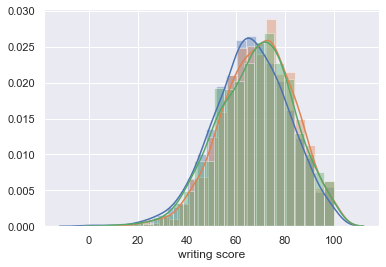

In [18]:
#distribution of numerical features
for i in num_ft:
    sns.distplot(raw_df[i])
    

The distributions looks normal. most of the data are falling in the 60-80 range for all of the features 


# Feature Engineering
    

In [19]:
#onehot encode categorical ft
lunch =df['lunch'].map({"standard":1, "free/reduced":0})
test_preparation = pd.get_dummies(df['test preparation course'], drop_first = True)
parental_education = df["parental level of education"].map({"bachelor's degree":1, 'some college':2, "master's degree":3,
       "associate's degree":4, 'high school':5, 'some high school':6})                       

In [20]:
df = df.drop(['parental level of education', 'lunch', 'test preparation course'], axis = 1)
df = pd.concat([df,lunch, test_preparation, parental_education], axis = 1)
df


,gender,math score,reading score,writing score,lunch,none,parental level of education
0,female,72,72,74,1,1,1
1,female,69,90,88,1,0,2
2,female,90,95,93,1,1,3
3,male,47,57,44,0,1,4
4,male,76,78,75,1,1,2
...,...,...,...,...,...,...,...
995,female,88,99,95,1,0,3
996,male,62,55,55,0,1,5
997,female,59,71,65,0,0,5
998,female,68,78,77,1,0,2


In [21]:
#convert gender feature
df['gender'] = df['gender'].map({'male':1, 'female':0})
df = df.drop("none", axis=1)

In [22]:
df


,gender,math score,reading score,writing score,lunch,parental level of education
0,0,72,72,74,1,1
1,0,69,90,88,1,2
2,0,90,95,93,1,3
3,1,47,57,44,0,4
4,1,76,78,75,1,2
...,...,...,...,...,...,...
995,0,88,99,95,1,3
996,1,62,55,55,0,5
997,0,59,71,65,0,5
998,0,68,78,77,1,2


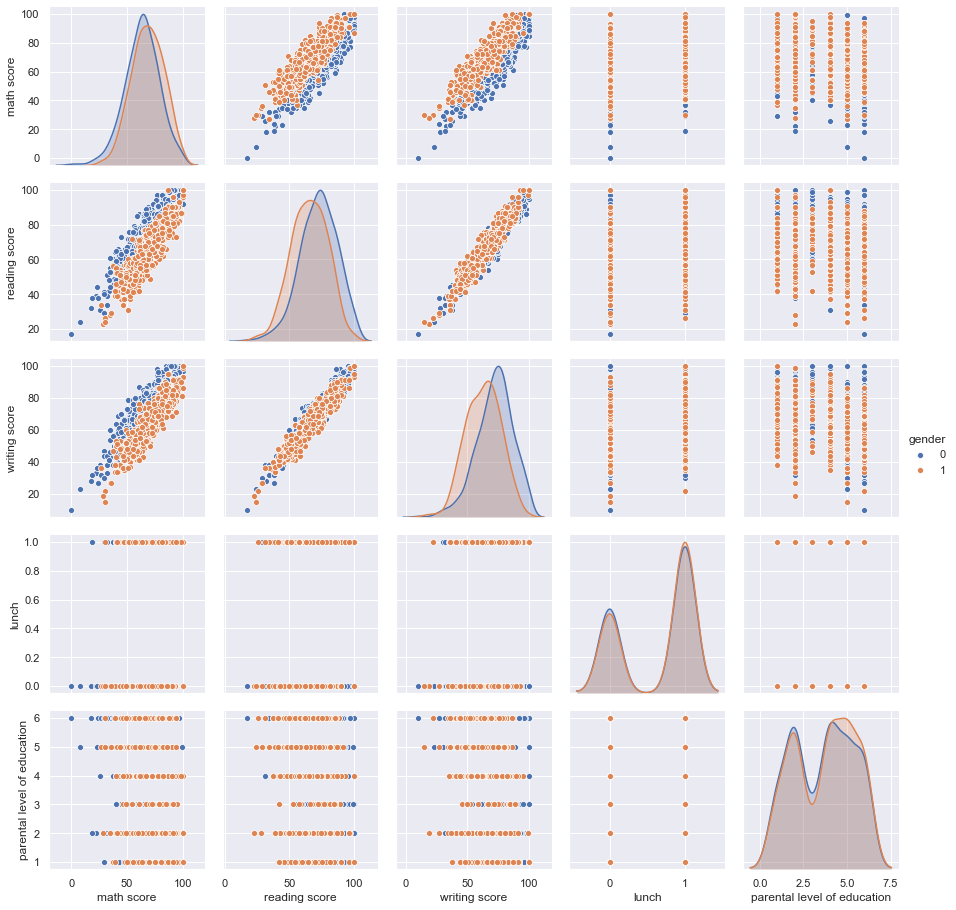

In [23]:
sns.pairplot(df, hue='gender')

the data points look linearly seperable.There isn't a whole lot of overlap happening in the test score. we start using linear model to classify the data

# Model Selection

In [24]:
#Logisitc Regression
x = df.drop('gender',axis = 1)
y = df['gender']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [26]:


from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [27]:
log.score(x_train,y_train)

0.88

In [28]:
log.score(x_test,y_test)

0.885

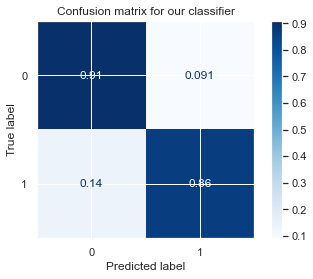

In [29]:
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix
matrix = plot_confusion_matrix(log, x_test, y_test, cmap=plt.cm.Blues, normalize='true')

plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [35]:
df.shape


(1000, 6)

In [31]:
df


,gender,math score,reading score,writing score,lunch,parental level of education
0,0,72,72,74,1,1
1,0,69,90,88,1,2
2,0,90,95,93,1,3
3,1,47,57,44,0,4
4,1,76,78,75,1,2
...,...,...,...,...,...,...
995,0,88,99,95,1,3
996,1,62,55,55,0,5
997,0,59,71,65,0,5
998,0,68,78,77,1,2


In [37]:
import pickle
pickle.dump(log,open("model.plk", 'wb'))

In [33]:
df.shape

(1000, 6)

In [36]:
log.predict(0,72,72,74,)

,gender,math score,reading score,writing score,lunch,parental level of education
0,0,72,72,74,1,1
1,0,69,90,88,1,2
2,0,90,95,93,1,3
3,1,47,57,44,0,4
4,1,76,78,75,1,2
...,...,...,...,...,...,...
995,0,88,99,95,1,3
996,1,62,55,55,0,5
997,0,59,71,65,0,5
998,0,68,78,77,1,2
